In [2]:
!git clone 'https://github.com/vikkyshrma/CS231N'

Cloning into 'CS231N'...
remote: Enumerating objects: 82, done.
remote: Counting objects: 100% (82/82), done.
remote: Compressing objects: 100% (72/72), done.
remote: Total 82 (delta 16), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (82/82), done.


In [6]:
%cd /content/CS231N/Assign1

/content/CS231N/Assign1


In [0]:
import random
import numpy as np
from cs231n.data_utils import load_CIFAR10
import matplotlib.pyplot as plt

from __future__ import print_function


%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


%load_ext autoreload
%autoreload 2

In [12]:
%cd cs231n/datasets/
!ls

/content/CS231N/Assign1/cs231n/datasets
get_datasets.sh  ini


In [13]:

!more get_datasets.sh

# Get CIFAR10
wget http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
tar -xzvf cifar-10-python.tar.gz
rm cifar-10-python.tar.gz 


In [14]:

!sh get_datasets.sh

--2019-11-13 08:57:46--  http://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz’

cifar-10-python.tar 100%[===================>] 162.60M  29.1MB/s    in 6.2s    

2019-11-13 08:57:52 (26.1 MB/s) - ‘cifar-10-python.tar.gz’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


In [17]:

%cd /content/CS231N/Assign1

/content/CS231N/Assign1


In [0]:
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'

In [0]:
try:
   del X_train, y_train
   del X_test, y_test
   print('Clear previously loaded data.')
except:
   pass

X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

In [22]:
print('Training data shape: ', X_train.shape)
print('Training labels shape: ', y_train.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Training data shape:  (50000, 32, 32, 3)
Training labels shape:  (50000,)
Test data shape:  (10000, 32, 32, 3)
Test labels shape:  (10000,)


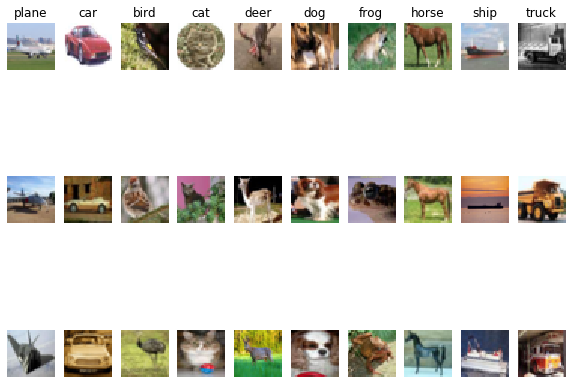

In [23]:
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 3
for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [0]:

# Split the data test, train and validation
# create a small development set as a subset of the training data;
# we can use this for development so our code runs faster.
num_training = 49000
num_validation = 1000
num_test = 1000
num_dev = 500

In [25]:
# Our validation set will be num_validation points from the original
# training set.
mask = range(num_training, num_training + num_validation)
X_val = X_train[mask]
y_val = y_train[mask]

# Our training set will be the first num_train points from the original
# training set.
mask = range(num_training)
X_train = X_train[mask]
y_train = y_train[mask]

# We will also make a development set, which is a small subset of
# the training set.
mask = np.random.choice(num_training, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# We use the first num_test points of the original test set as our
# test set.
mask = range(num_test)
X_test = X_test[mask]
y_test = y_test[mask]

print('Train data shape: ', X_train.shape)
print('Train labels shape: ', y_train.shape)
print('Validation data shape: ', X_val.shape)
print('Validation labels shape: ', y_val.shape)
print('Test data shape: ', X_test.shape)
print('Test labels shape: ', y_test.shape)

Train data shape:  (49000, 32, 32, 3)
Train labels shape:  (49000,)
Validation data shape:  (1000, 32, 32, 3)
Validation labels shape:  (1000,)
Test data shape:  (1000, 32, 32, 3)
Test labels shape:  (1000,)


In [26]:
# Preprocessing: reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_val = np.reshape(X_val, (X_val.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
X_dev = np.reshape(X_dev, (X_dev.shape[0], -1))


print('Training data shape: ', X_train.shape)
print('Validation data shape: ', X_val.shape)
print('Test data shape: ', X_test.shape)
print('dev data shape: ', X_dev.shape)

Training data shape:  (49000, 3072)
Validation data shape:  (1000, 3072)
Test data shape:  (1000, 3072)
dev data shape:  (500, 3072)


[130.64189796 135.98173469 132.47391837 130.05569388 135.34804082
 131.75402041 130.96055102 136.14328571 132.47636735 131.48467347
 136.58542857 132.78293878]


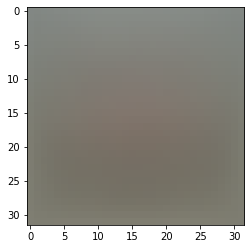

In [28]:
# Preprocessing: subtract the mean image
# first: compute the image mean based on the training data
mean_image = np.mean(X_train, axis=0)
print(mean_image[:12]) # print a few of the elements
plt.figure(figsize=(4,4))
plt.imshow(mean_image.reshape((32,32,3)).astype('uint8')) 
# visualize the mean image, reshape back from row to 3D
plt.show()

In [0]:
# second: subtract the mean image from train and test data
X_train -= mean_image
X_val -= mean_image
X_test -= mean_image
X_dev -= mean_image

In [30]:
# third: append the bias dimension of ones (i.e. bias trick) so that our SVM
# only has to worry about optimizing a single weight matrix W.
X_train = np.hstack([X_train, np.ones((X_train.shape[0], 1))])
X_val = np.hstack([X_val, np.ones((X_val.shape[0], 1))])
X_test = np.hstack([X_test, np.ones((X_test.shape[0], 1))])
X_dev = np.hstack([X_dev, np.ones((X_dev.shape[0], 1))])

print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

(49000, 3073) (1000, 3073) (1000, 3073) (500, 3073)


In [0]:
from cs231n.classifier.linear_svm import svm_loss_naive
import time

In [34]:
W = np.random.randn(3073, 10) * 0.0001 

loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.000005)
print('loss: %f' % (loss, ))

loss: 9.310102


In [0]:
loss, grad = svm_loss_naive(W, X_dev, y_dev, 0.0)

In [36]:
from cs231n.gradient_check import grad_check_sparse
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 0.0)[0]
grad_numerical = grad_check_sparse(f, W, grad)

numerical: -2.623472 analytic: -2.623472, relative error: 4.492745e-11
numerical: -6.674295 analytic: -6.674295, relative error: 3.209085e-11
numerical: 9.184272 analytic: 9.201974, relative error: 9.628010e-04
numerical: 10.945757 analytic: 10.945757, relative error: 1.074049e-11
numerical: 21.875941 analytic: 21.799195, relative error: 1.757200e-03
numerical: 4.851754 analytic: 4.851754, relative error: 2.478220e-11
numerical: -21.167197 analytic: -21.167197, relative error: 3.409345e-12
numerical: -1.725662 analytic: -1.725662, relative error: 1.972198e-10
numerical: 10.131284 analytic: 10.131284, relative error: 2.119076e-11
numerical: -10.494056 analytic: -10.494056, relative error: 2.380845e-11


In [37]:
print('With regularization')
loss, grad = svm_loss_naive(W, X_dev, y_dev, 5e1)
f = lambda w: svm_loss_naive(w, X_dev, y_dev, 5e1)[0]
grad_numerical = grad_check_sparse(f, W, grad)

With regularization
numerical: -18.227502 analytic: -18.227502, relative error: 1.585394e-11
numerical: -7.042744 analytic: -7.042744, relative error: 5.125151e-12
numerical: 5.685337 analytic: 5.629722, relative error: 4.915125e-03
numerical: 20.870398 analytic: 20.870398, relative error: 6.123080e-13
numerical: -19.394318 analytic: -19.394318, relative error: 3.573135e-11
numerical: 7.586678 analytic: 7.580211, relative error: 4.263793e-04
numerical: -2.975831 analytic: -2.975831, relative error: 1.778768e-10
numerical: 1.957499 analytic: 1.957499, relative error: 1.485104e-10
numerical: 9.939657 analytic: 10.010490, relative error: 3.550508e-03
numerical: 3.593516 analytic: 3.593516, relative error: 2.059577e-11


In [39]:
tic = time.time()
loss_naive, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss: %e computed in %fs' % (loss_naive, toc - tic))

from cs231n.classifier.linear_svm import svm_loss_vectorized
tic = time.time()
loss_vectorized, _ = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss: %e computed in %fs' % (loss_vectorized, toc - tic))

print('difference: %f' % (loss_naive - loss_vectorized))

Naive loss: 9.310102e+00 computed in 0.112232s
Vectorized loss: 9.310102e+00 computed in 0.016654s
difference: -0.000000


In [40]:
tic = time.time()
_, grad_naive = svm_loss_naive(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Naive loss and gradient: computed in %fs' % (toc - tic))

tic = time.time()
_, grad_vectorized = svm_loss_vectorized(W, X_dev, y_dev, 0.000005)
toc = time.time()
print('Vectorized loss and gradient: computed in %fs' % (toc - tic))

difference = np.linalg.norm(grad_naive - grad_vectorized, ord='fro')
print('difference: %f' % difference)

Naive loss and gradient: computed in 0.089191s
Vectorized loss and gradient: computed in 0.011308s
difference: 0.000000


In [42]:
from cs231n.classifier import LinearSVM
svm = LinearSVM()
tic = time.time()
loss_hist = svm.train(X_train, y_train, learning_rate=1e-7, reg=2.5e4,
                      num_iters=1500, verbose=True)
toc = time.time()
print('That took %fs' % (toc - tic))

iteration 0 / 1500: loss 798.802401
iteration 100 / 1500: loss 290.966101
iteration 200 / 1500: loss 109.891448
iteration 300 / 1500: loss 43.505444
iteration 400 / 1500: loss 19.225237
iteration 500 / 1500: loss 10.302322
iteration 600 / 1500: loss 7.201736
iteration 700 / 1500: loss 5.920630
iteration 800 / 1500: loss 5.795837
iteration 900 / 1500: loss 5.596009
iteration 1000 / 1500: loss 5.342541
iteration 1100 / 1500: loss 5.253938
iteration 1200 / 1500: loss 5.403141
iteration 1300 / 1500: loss 5.542442
iteration 1400 / 1500: loss 5.148534
That took 9.333333s


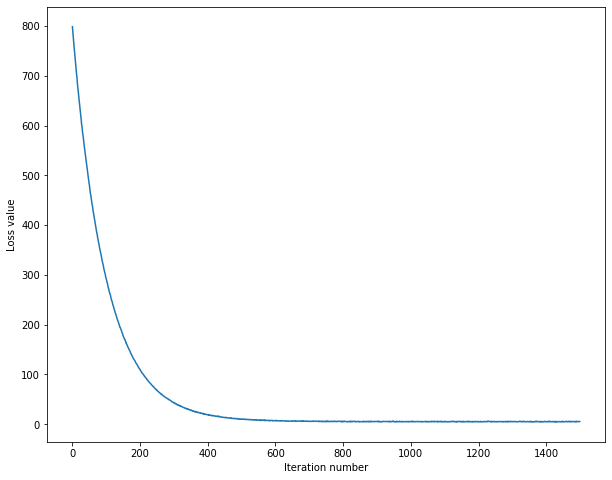

In [43]:
plt.plot(loss_hist)
plt.xlabel('Iteration number')
plt.ylabel('Loss value')
plt.show()

In [44]:
y_train_pred = svm.predict(X_train)
print('training accuracy: %f' % (np.mean(y_train == y_train_pred), ))
y_val_pred = svm.predict(X_val)
print('validation accuracy: %f' % (np.mean(y_val == y_val_pred), ))

training accuracy: 0.368898
validation accuracy: 0.388000


In [0]:
learning_rates = [1e-7, 5e-7]
regularization_strengths = [5e2, 1e3, 5e3, 1e4]

In [0]:
results = {}
best_val = -1  
best_svm = None

In [47]:
num_iters = 2000
hyperparameters = [(a, b) for a in learning_rates for b in regularization_strengths]
verbose = True

for rate, strength in hyperparameters: 
    svm = LinearSVM()
    if verbose:
        print('rate: {}, strength {}'.format(rate, strength))
    svm.train(X_train, y_train, learning_rate=rate, reg=strength,
              num_iters=num_iters, verbose=verbose)
    y_train_pred = svm.predict(X_train)
    y_val_pred = svm.predict(X_val)
    train_accuracy = np.mean(y_train == y_train_pred)
    val_accuracy = np.mean(y_val == y_val_pred)
    results[(rate, strength)] = (train_accuracy, val_accuracy)
    if val_accuracy > best_val:
        best_val = val_accuracy
        best_svm = svm

rate: 1e-07, strength 500.0
iteration 0 / 2000: loss 36.585100
iteration 100 / 2000: loss 25.533498
iteration 200 / 2000: loss 24.006879
iteration 300 / 2000: loss 21.828981
iteration 400 / 2000: loss 21.993587
iteration 500 / 2000: loss 21.129937
iteration 600 / 2000: loss 19.900714
iteration 700 / 2000: loss 20.582989
iteration 800 / 2000: loss 19.872160
iteration 900 / 2000: loss 18.903664
iteration 1000 / 2000: loss 18.905544
iteration 1100 / 2000: loss 18.732394
iteration 1200 / 2000: loss 16.882409
iteration 1300 / 2000: loss 16.553749
iteration 1400 / 2000: loss 17.147171
iteration 1500 / 2000: loss 16.019888
iteration 1600 / 2000: loss 17.593420
iteration 1700 / 2000: loss 15.392061
iteration 1800 / 2000: loss 15.123342
iteration 1900 / 2000: loss 15.237511
rate: 1e-07, strength 1000.0
iteration 0 / 2000: loss 51.011775
iteration 100 / 2000: loss 40.509261
iteration 200 / 2000: loss 37.222673
iteration 300 / 2000: loss 34.783289
iteration 400 / 2000: loss 33.005175
iteration 50

In [48]:
for lr, reg in sorted(results):
    train_accuracy, val_accuracy = results[(lr, reg)]
    print('lr %e reg %e train accuracy: %f val accuracy: %f' % (
                lr, reg, train_accuracy, val_accuracy))
    
print('best validation accuracy achieved during cross-validation: %f' % best_val)

lr 1.000000e-07 reg 5.000000e+02 train accuracy: 0.325490 val accuracy: 0.324000
lr 1.000000e-07 reg 1.000000e+03 train accuracy: 0.332653 val accuracy: 0.335000
lr 1.000000e-07 reg 5.000000e+03 train accuracy: 0.388000 val accuracy: 0.405000
lr 1.000000e-07 reg 1.000000e+04 train accuracy: 0.381449 val accuracy: 0.385000
lr 5.000000e-07 reg 5.000000e+02 train accuracy: 0.384714 val accuracy: 0.369000
lr 5.000000e-07 reg 1.000000e+03 train accuracy: 0.386571 val accuracy: 0.380000
lr 5.000000e-07 reg 5.000000e+03 train accuracy: 0.365265 val accuracy: 0.366000
lr 5.000000e-07 reg 1.000000e+04 train accuracy: 0.347714 val accuracy: 0.341000
best validation accuracy achieved during cross-validation: 0.405000


In [49]:
y_test_pred = best_svm.predict(X_test)
test_accuracy = np.mean(y_test == y_test_pred)
print('linear SVM on raw pixels final test set accuracy: %f' % test_accuracy)

linear SVM on raw pixels final test set accuracy: 0.377000


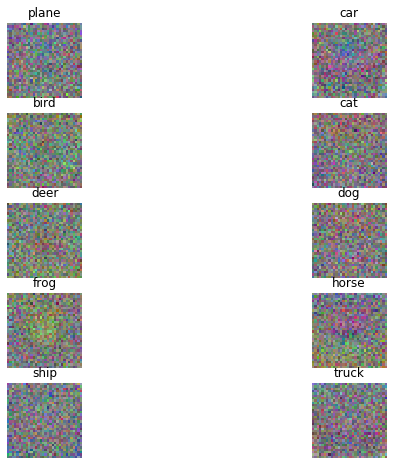

In [51]:
w = best_svm.W[:-1,:] 
w = w.reshape(32, 32, 3, 10)
w_min, w_max = np.min(w), np.max(w)
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
for i in range(10):
    plt.subplot(5, 2, i + 1)
      
    # Rescale the weights to be between 0 and 255
    wimg = 255.0 * (w[:, :, :, i].squeeze() - w_min) / (w_max - w_min)
    plt.imshow(wimg.astype('uint8'))
    plt.axis('off')
    plt.title(classes[i])